In [1]:
import os
import imars3d

from imars3d.backend.dataio.data import load_data
from imars3d.backend.preparation.normalization import normalization

import matplotlib.pyplot as plt

import numpy as np
%matplotlib notebook

In [2]:
base_path = "/HFIR/CG1D/IPTS-33592/raw/"

In [3]:
raw = base_path + "ct_scans/2024_07_03_lam_circuit_small/circuit_small_0030_359_890_2146.tiff"
assert os.path.exists(raw)

In [4]:
ob = base_path + "ob/2024_07_03_lam_circuit_small/OB_0030_2151.tiff"
assert os.path.exists(ob)

In [5]:
dc = base_path + "dc/2024_07_02_pressure/DC_0060_6362.tiff"
assert os.path.exists(dc)

In [6]:
# raw_data, ob_data, dc_data, angles = load_data(ct_files=[raw],
#                                       ob_files=[ob],
#                                       dc_files=[dc])

raw_data, ob_data, dc_data, angles = load_data(ct_files=[raw],
                                      ob_files=[ob],
                                      ) 

dc_files is [].


ct:   0%|          | 0/1 [00:00<?, ?it/s]

ob:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


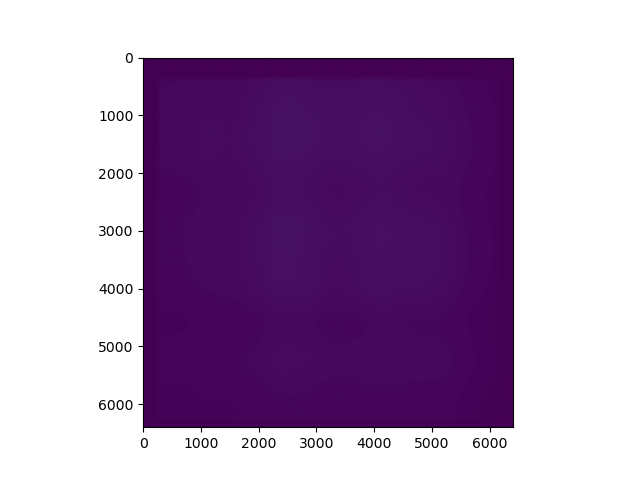

In [10]:
plt.figure(num='ob')
plt.imshow(ob_data[0])

In [10]:
# make up fake dc
height, width = np.shape(raw_data[0])
dc = np.array(np.zeros((height, width)))

In [11]:
normalized_data = normalization(arrays=raw_data,
                               flats=ob_data,
                               darks=dc)

In [12]:
normalized_data

array([[[1.0026797 , 0.9995127 , 0.99586475, ..., 0.9978022 ,
         1.001467  , 1.0007337 ],
        [0.9949128 , 0.99902415, 0.99757457, ..., 1.        ,
         0.9992667 , 1.0039226 ],
        [1.0036621 , 0.99902654, 1.0007299 , ..., 1.0002447 ,
         1.0017136 , 1.0009785 ],
        ...,
        [0.9992672 , 1.0044031 , 0.9968262 , ..., 0.9995111 ,
         0.99828976, 1.0007342 ],
        [1.000977  , 0.99975646, 0.999022  , ..., 1.0004889 ,
         1.0009787 , 0.9987766 ],
        [0.99804544, 1.0007323 , 0.99635744, ..., 1.        ,
         0.9963361 , 1.0007335 ]]], dtype=float32)

<IPython.core.display.Javascript object>


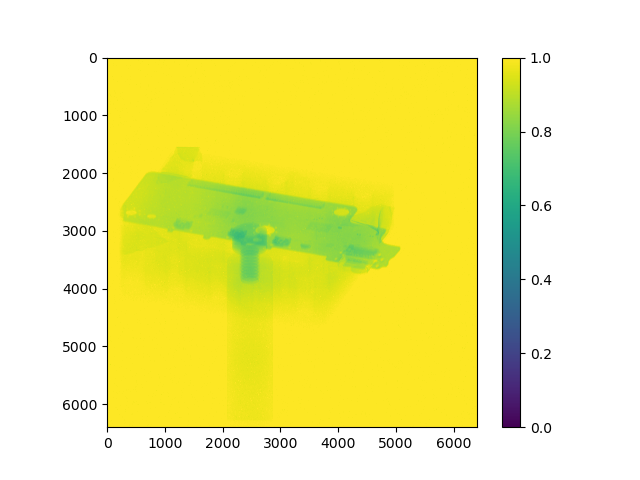

In [13]:
plt.imshow(normalized_data[0], vmin=0, vmax=1)
plt.colorbar()